<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/ML3_Ghouls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("JS")

JS


# Importing all required Libraries

In [21]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
# import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
import plotly.graph_objects as go
import plotly.express as px
from subprocess import check_output
# plotly.tools.set_credentials_file(username='sudhakar.anemu', api_key='gsV5SUHPip75363I87dw')
import warnings
warnings.filterwarnings('ignore')


#library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rnd

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV



# Import the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



print("Import all required Libraries - Done")


Import all required Libraries - Done


# Preprofiling of the Training Dataset

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-4/master/Projects/Ghouls_train.csv', index_col=0)
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="jsghoulstrain.html")

# Playing with Plottly

## Display data in the table form

In [4]:
plotty_df = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-4/master/Projects/Ghouls_train.csv', index_col=0)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(plotty_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[plotty_df.bone_length, plotty_df.rotting_flesh, plotty_df.hair_length, plotty_df.has_soul, plotty_df.color, plotty_df.type],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [5]:
fig = px.scatter(plotty_df, x="bone_length", y="rotting_flesh", color="type",
                 size='bone_length', hover_data=['rotting_flesh'])
fig.show()

## Heatmpa

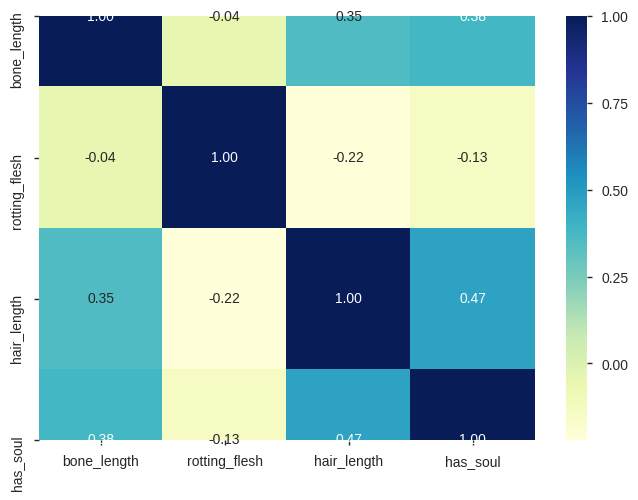

In [6]:
sns.heatmap(plotty_df.corr(), annot = True, fmt = ".2f", cmap = 'YlGnBu')

In [7]:
fig = go.Figure(data=go.Heatmap(
                   z=plotty_df.corr(),
                   x=['bone_length', 'rotting_flesh', 'hair_length', 'has_soul'],
                   y=['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']))
fig.show()

## Scatter Pairplot

In [8]:
fig = px.scatter_matrix(plotty_df,
    dimensions=["bone_length", "rotting_flesh", "hair_length", "has_soul", "color", "type"],
    color="color", symbol="color",
    title="Scatter matrix of Ghouls data set",
    labels={col:col.replace('_', ' ') for col in plotty_df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()


# Load Training Dataset and verifying

## Loading the Train Dataset

In [0]:
df_trnng = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-4/master/Projects/Ghouls_train.csv', index_col=0)

## View the sample data

In [10]:
df_trnng.head(10)

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost
7,0.405680,0.253277,0.441420,0.280324,green,Goblin
8,0.399331,0.568952,0.618391,0.467901,white,Goblin
11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
12,0.314295,0.671280,0.417267,0.227548,blue,Ghost


## Verifying properties of the DataSet
a. Only 371 rows and 6 columns<br>
b. No null, Data looks clear and good. 


In [11]:
print(150*'*')
print("Shape of the Dataset : ", df_trnng.shape)
print(150*'-')
print("Columns : ", df_trnng.columns)
print(150*'&')
print("Info of the Dataset : ", df_trnng.info())
print(150*'^')
print("Description of the Dataset : ", df_trnng.describe())
print(150*'%')
print("Verify the count of Null", df_trnng.isnull().sum())

******************************************************************************************************************************************************
Shape of the Dataset :  (371, 6)
------------------------------------------------------------------------------------------------------------------------------------------------------
Columns :  Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type'],
      dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 897
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 20.3+ KB
Info of

## Verifying Unique values of each feature

In [12]:
colList = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("S.No :", count, "Name of the column : ",colList[i])
    print(df_trnng[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

S.No : 1 Name of the column :  bone_length
[0.35451218 0.57555991 0.4678755  0.77665246 0.5661166  0.40567974
 0.39933085 0.5162239  0.31429528 0.28094174 0.43168521 0.58454323
 0.39071213 0.35155867 0.51338722 0.50019655 0.25077    0.58555932
 0.60583596 0.52408038 0.50316406 0.47260329 0.37444857 0.34334961
 0.6872555  0.2290099  0.38850055 0.4924381  0.41166269 0.30419779
 0.67297706 0.46509395 0.5545096  0.52372856 0.55819608 0.45637104
 0.3949582  0.63634677 0.56428176 0.2880501  0.4151097  0.45693516
 0.53426635 0.38495798 0.31414288 0.28719319 0.48171636 0.26814129
 0.36288711 0.29522914 0.57161877 0.49546706 0.44513172 0.62765237
 0.39725803 0.67851874 0.30430153 0.51527498 0.50423649 0.51267669
 0.62241365 0.20862517 0.75350514 0.49098777 0.66543197 0.60963426
 0.42496899 0.64417555 0.31141822 0.22753209 0.31527603 0.39076916
 0.34899142 0.51024217 0.5861773  0.480836   0.49833638 0.23704

# Load Test Dataset and verifying
a. No Null - Data looks clean<br>
b. 529 rows and 5 columns. Not much data. <br>
c. color is String rest all are float. <br>
d. 

## Loading the Test Dataset

In [0]:
df_test = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-4/master/Projects/Ghouls_test.csv', index_col=0)

## View the sample data

In [0]:
df_test.head(10)

## Verifying properties of the DataSet

In [0]:
print(150*'*')
print("Shape of the Dataset : ", df_test.shape)
print(150*'-')
print("Columns : ", df_test.columns)
print(150*'&')
print("Info of the Dataset : ", df_test.info())
print(150*'^')
print("Description of the Dataset : ", df_test.describe())
print(150*'%')
print("Verify the count of Null", df_test.isnull().sum())

## Verifying Unique values of each feature

In [0]:
colList = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("S.No :", count, "Name of the column : ",colList[i])
    print(df_test[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

# Setting up a Base model

## Logistic Regression

In [25]:
df_trnng.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [0]:
df = pd.get_dummies(df_trnng.drop('type', axis = 1))

In [28]:
df.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
id,,,,,,,,,,
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0
4,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0
5,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df, df_trnng['type'], test_size = 0.25, random_state = 0)
print("X_train : shape : ", X_train.shape)
print("X_test : shape : ", X_test.shape)
print("y_train : shape : ", y_train.shape)
print("y_test : shape : ", y_test.shape)

X_train : shape :  (278, 10)
X_test : shape :  (93, 10)
y_train : shape :  (278,)
y_test : shape :  (93,)


In [37]:
X_train.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
id,,,,,,,,,,
641,0.622371,0.385204,0.308995,0.295509,0,0,0,0,0,1
558,0.518231,0.494491,0.545443,0.600393,1,0,0,0,0,0
462,0.208885,0.399537,0.421704,0.216800,1,0,0,0,0,0
534,0.469020,0.621063,0.641631,0.598485,0,0,0,0,0,1
732,0.534001,0.595992,0.850140,0.794247,0,0,0,0,1,0


In [39]:
y_train.head(5)

id
641     Ghost
558     Ghoul
462     Ghost
534    Goblin
732     Ghoul
Name: type, dtype: object

In [32]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [0]:
# params = {'penalty':['l1', 'l2'], 'C':[1, 2, 3, 5, 10]}
# lr = LogisticRegression(random_state = 0)
# clf = GridSearchCV(lr, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
# clf.fit(X_train, y_train)
# print('Best score: {}'.format(clf.best_score_))
# print('Best parameters: {}'.format(clf.best_params_))





# df = pd.get_dummies(train_data.drop('type', axis = 1))
# X_train, X_test, y_train, y_test = train_test_split(df, train_data['type'], test_size = 0.25, random_state = 0)

# dt_clf = DecisionTreeClassifier(random_state = 0)
# dt_clf.fit(X_train, y_train)
# y_pred = dt_clf.predict(X_test)

# print(metrics.classification_report(y_test, y_pred))
# print("\nAccuracy Score is: " + str(metrics.accuracy_score(y_test, y_pred)))




In [0]:
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score)